## **Installation**

In [36]:
!pip install -q condacolab
import condacolab
condacolab.install()


✨🍰✨ Everything looks OK!


In [37]:
!conda create -n SDAL python=3.10 -y
!source /usr/local/etc/profile.d/conda.sh && conda activate SDAL

!conda install -c conda-forge gdown root=6.28.10 -y

import os
os.environ["PATH"] = "/usr/local/envs/SDAL/bin:" + os.environ["PATH"]
os.environ["PYTHONPATH"] = "/usr/local/envs/SDAL/lib/python3.10/site-packages"



Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/SDAL

  added / updated specs:
    - python=3.10


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  bzip2              conda-forge/linux-64::bzip2-1.0.8-h4bc722e_7 
  ca-certificates    conda-forge/linux-64::ca-certificates-2025.1.31-hbcca054_0 
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_linux-64-2.43-h712a8e2_4 
  libexpat           conda-forge/linux-64::libexpat-2.7.0-h5888daf_0 
  libffi             conda-forge/linux-64::libffi-3.4.6-h2dba641_1 
  libgcc             conda-forge/linux-64::libgcc-14.2.0-h767d61c_2

## Download Files

In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1LFEmLyAOjkmdSRWlApkvqsbzHuDLmty_' -O psiprime_bin9_histo.root


!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gjGdbwLATEsfbTlPes3XWUTThltebTkT' -O hlt_5_newSoftMuon_alsoInPsiPrimeWind.root


--2025-04-10 18:40:01--  https://docs.google.com/uc?export=download&id=1LFEmLyAOjkmdSRWlApkvqsbzHuDLmty_
Resolving docs.google.com (docs.google.com)... 192.178.129.139, 192.178.129.100, 192.178.129.138, ...
Connecting to docs.google.com (docs.google.com)|192.178.129.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1LFEmLyAOjkmdSRWlApkvqsbzHuDLmty_&export=download [following]
--2025-04-10 18:40:01--  https://drive.usercontent.google.com/download?id=1LFEmLyAOjkmdSRWlApkvqsbzHuDLmty_&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4064 (4.0K) [application/octet-stream]
Saving to: ‘psiprime_bin9_histo.root’

psiprime_bin9_histo 100%[===================>]   3.97K  --

## Create Folders

**Setup: Choose working mode**

Select the appropriate mode by setting the `MODE` variable in the next cell.

- `"temp"`: Use Colab's temporary storage (`/content`).  
  This does **not require Google Drive**.  
  All `.root` files must already be in `/content/` (e.g., uploaded or downloaded there).  
  These files will be moved into a subfolder (`content/exercise_5`) for processing.  
  **Important:** All data in `/content/` is deleted when the Colab session ends.

- `"drive_cp"`: Use Google Drive and copy all `.root` files from `/content/` into your Drive.  
  This creates two folders under `Colab Notebooks`:  
  - `exercise_5/` for data  
  - `Plots/` for outputs  
  Recommended for first-time setup.

- `"drive_use"`: Use Google Drive assuming the `.root` files are **already** in your Drive.  
  Use this mode to resume work without copying files again.

---


In [38]:
# MODE options:
# "temp":      use temporary /content space, move .root files to temp data_dir
# "drive_cp":  use Google Drive, copy .root files into Drive
# "drive_use": use Google Drive, assume files already exist there

MODE = "drive_use"  # ← change to "drive_cp" or "drive_use" if needed

import os
if MODE.startswith("drive"):
    from google.colab import drive
    drive.mount('/content/drive')
    base = "/content/drive/My Drive/Colab Notebooks"
    data_dir = f"{base}/exercise_5"
    plot_dir = f"{base}/Plots"
else:
    data_dir = "/content/exercise_5"
    plot_dir = "/content/Plots"

os.makedirs(data_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

if MODE == "drive_cp":
    !cp *.root "$data_dir"
elif MODE == "temp":
    !cp *.root "$data_dir"

if not os.listdir(data_dir):
    raise RuntimeError("No ROOT files found.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import ROOT
from ROOT import TFile, TH1F, TCanvas, gROOT, gStyle
from ROOT import RooRealVar, RooDataHist, RooArgSet, RooFit
from ROOT import RooGaussian, RooChebychev, RooAddPdf, RooArgList
from ROOT import TGraphAsymmErrors
from ROOT import RooPlot, RooCBShape, RooFormulaVar, RooExponential
from ROOT import TGraphErrors, TF1, TH1D, gPad, TLegend, TAxis, TColor
from array import array


# **PART 1**

In [40]:

f1 = ROOT.TFile("/content/psiprime_bin9_histo.root", "READ") #open only in READ mode
f1.ls()

TFile**		/content/psiprime_bin9_histo.root	
 TFile*		/content/psiprime_bin9_histo.root	
  KEY: TH1F	PsiPrimeMass_bin9;1	#psi' for y in [-0.8, -0.6]


In [7]:
gROOT.ForceStyle()
gStyle.SetTitleOffset(1.4, "Y")
gStyle.SetOptFit(1)

In [41]:
#select and get the histogram to fit (bin-9):
hPsiPrime = f1.Get("PsiPrimeMass_bin9")

#get histogram' features and define the random variable
xMin = hPsiPrime.GetXaxis().GetXmin()
xMax = hPsiPrime.GetXaxis().GetXmax()
nBins = hPsiPrime.GetNbinsX()
bin_width = hPsiPrime.GetBinWidth(1) #needed later


xVar = RooRealVar("xVar", "m(#mu^{+}#mu^{-}) [GeV/c^{2}]", xMin, xMax)
xVar.setBins(nBins)

#create the histogram as an object (RooDataHist) that can be interpolated by RooFit:

MuMuHist = RooDataHist("#mu#mu_hist", hPsiPrime.GetTitle(), RooArgSet(xVar), ROOT.RooFit.Import(hPsiPrime, False))

#note: this object, as defined, will undergo a BINNED Maximum Likelihood Fit (BML-fit)


In [42]:
# -- Create the fitting model

# -- Signal model -->Gaussian resolution function
mG = RooRealVar("mean", "mean", 3.7, 3.67, 3.73)
sigma1 = RooRealVar("#sigma_{1}", "sigma1", 0.02, 0.001, 0.1)
sigPDF = RooGaussian("sigPDF", "Signal", xVar, mG, sigma1)

# -- Background model. --> Chebyshev (2nd order)
c1 = RooRealVar("c_{1}", "c1", -0.1, -10, 10)
c2 = RooRealVar("c_{2}", "c2", -0.1, -10, 10)
bkgPDF = RooChebychev("bkgPDF", "bkgPDF", xVar, RooArgSet(c1, c2))

# -- Yield parameters
nSig = RooRealVar("nSig", "Number of signal candidates", 2e+5, 1., 1e+6)
nBkg = RooRealVar("nBkg", "Bkg component", 120e+3, 1., 1e+6)

# -- Combine signal and background models
totalPDF = RooAddPdf("totalPDF", "totalPDF", RooArgList(sigPDF, bkgPDF), RooArgList(nSig, nBkg)) #fitting model

# The PDF defined in this way is implicitely configured to be an EXTENDED BML-fit !!
# It shouldn;t be the need to explicit with ... ROOT.RooFit.Extended(True)
#
# -- Execute the Binned ML fit (HESSE is the default; add MINOS if you want asymmetric errors)
# totalPDF.fitTo(MuMuHist, ROOT.RooFit.Extended(True), ROOT.RooFit.Minos(True))
# implicitely:  totalPDF->fitTo(*MuMuHist, Extended(kTRUE), Minos(kFALSE));

totalPDF.fitTo(MuMuHist, ROOT.RooFit.Extended(True), ROOT.RooFit.Minos(False)) #fit execution (with the chosen options)


<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sigPDF,bkgPDF)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 #sigma_{1}   2.00000e-02  9.50000e-03    1.00000e-03  1.00000e-01
     2 c_{1}       -1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     3 c_{2}       -1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     4 mean         3.70000e+00  6.00000e-03    3.67000e+00  3.73000e+00
     5 nBkg         1.20000e+05  5.99995e+04    1.00000e+00  1.00000e+06
     6 nSig         2.00000e+05  9.99995e+04    1.00000e+00  1.00000e+06
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW U

[#1] INFO:Plotting -- RooAbsPdf::plotOn(totalPDF) directly selected PDF components: (sigPDF)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(totalPDF) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(totalPDF) directly selected PDF components: (bkgPDF)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(totalPDF) indirectly selected PDF components: ()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myC
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/Plots/PsiPrimeMassFit_gauss_poly2ord.png has been created


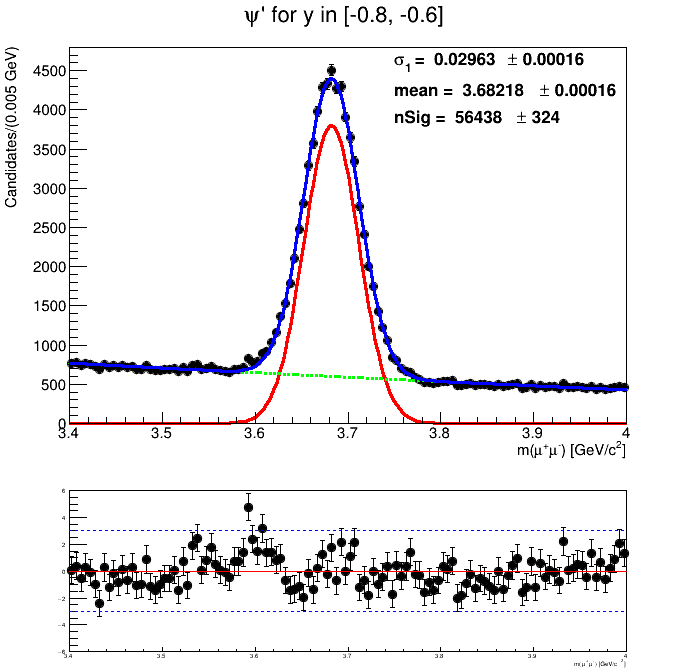

In [43]:
#Prepare graphical representation (usual one plus the fit bin-by-bin pulls)

#create the "Canvas" (graphic space to temporarily store the output):
myC = ROOT.TCanvas("myC", "PsiPrimeMassPlot", 700, 700)

# Create frame for the variable
xframe = xVar.frame()
xframe.SetTitle(hPsiPrime.GetTitle())
#xframe.SetYTitle("Candidates / 5 MeV/c^{2}") # 120 bins x 600MeV, but better to get the bin-width automatically (next line)

# Set Y title with bin width
newlabel = "Candidates/(%.3f GeV)" % bin_width
xframe.SetYTitle(newlabel)

# Plot data and PDFs on the frame
MuMuHist.plotOn(xframe)
totalPDF.plotOn(xframe)

# Plot signal and background components with specific colors and styles
totalPDF.plotOn(xframe, RooFit.Components(ROOT.RooArgSet(sigPDF)), RooFit.LineColor(ROOT.kRed))
totalPDF.plotOn(xframe, RooFit.Components(ROOT.RooArgSet(bkgPDF)), RooFit.LineColor(ROOT.kGreen), RooFit.LineStyle(ROOT.kDashed))

totalPDF.plotOn(xframe) #needed unless I do not add pulls; comment to show why it is needed to get the correct bin-by-bin pulls!

# Add parameter box with best ML estimates
totalPDF.paramOn(xframe, RooFit.Parameters(ROOT.RooArgSet(mG, sigma1, nSig)), RooFit.Layout(0.55, 0.9, 0.9))

#xframe.getAttText()->SetTextSize(0.03)   #not-needed


###### Goodness-of-fit with bin-by-bin pulls

# Create frame for pulls
framePull = xVar.frame()
framePull.SetTitle(" ")
framePull.addObject(xframe.pullHist(), "p")  #RooPlot has a list of objects (TObjects) that can be drawn
framePull.SetMinimum(-6)
framePull.SetMaximum(6)

hPulls = xframe.pullHist()  #useful later

# Divide canvas into two pads; framePull will be hosted in the bottom pad
myC.Divide(0, 2)

# Go to bottom pad
myC.cd(2)
ROOT.gPad.SetPad(0., 0., 1., 0.3)
framePull.Draw()

# Draw lines
line = ROOT.TLine(3.4, 0., 4., 0.)
line.SetLineColor(2)
line.Draw("same")

lineUp = ROOT.TLine(3.4, 3., 4., 3.)
lineUp.SetLineColor(4)
lineUp.SetLineStyle(ROOT.kDashed)
lineUp.Draw("same")

lineDown = ROOT.TLine(3.4, -3., 4., -3.)
lineDown.SetLineColor(4)
lineDown.SetLineStyle(ROOT.kDashed)
lineDown.Draw("same")

# Go to top pad
myC.cd(1)
ROOT.gPad.SetPad(0., 0.3, 1., 1.)
xframe.Draw()

# Save canvas
myC.SaveAs(f"{plot_dir}/PsiPrimeMassFit_gauss_poly2ord.png")
myC.Draw()
#myC.Clear() #later



Warning in <TCanvas::Delete()>: may not use this method
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCP
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/Plots/Pulls.png has been created


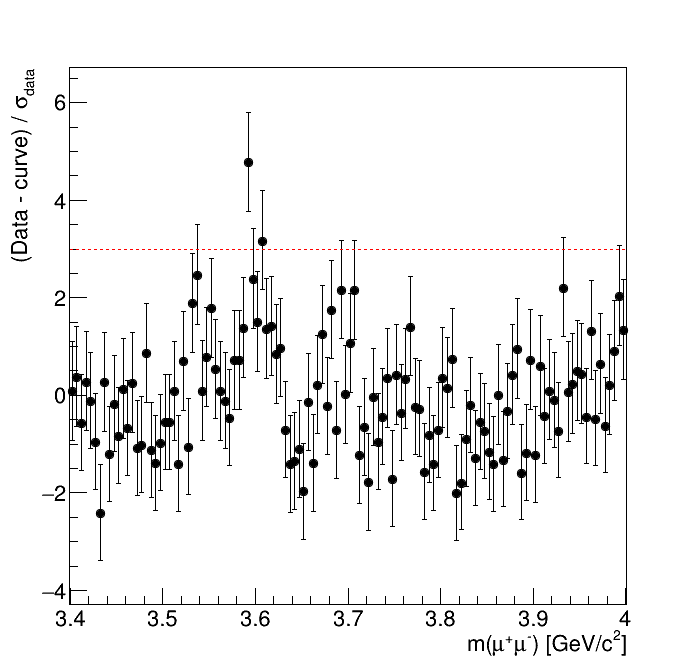

In [50]:

myC.Clear()
myC.Delete()

# Create canvas for pulls
myCP = ROOT.TCanvas("myCP", "Plot of bin-by-bin pulls", 700, 700)
myCP.cd()
hPulls.SetTitle("")
hPulls.Draw("AP")

onlyLineUp = ROOT.TLine(3.4, 3., 4., 3.)
onlyLineUp.SetLineColor(2)
onlyLineUp.SetLineStyle(ROOT.kDashed)
onlyLineUp.Draw("same")

myCP.SaveAs(f"{plot_dir}/Pulls.png")
myCP.Draw()

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sigCBPdf,bkgExpPdf)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 #alpha       2.00000e+00  7.50000e-01    5.00000e-01  1.00000e+01
     2 #gamma      -1.00000e-01  4.50000e-02   -2.00000e+00 -1.00000e-02
     3 #mu_{CB}     3.70000e+00  6.00000e-03    3.67000e+00  3.73000e+00
     4 #sigma_{CB}   2.00000e-02  9.50000e-03    1.00000e-03  1.00000e-01
     5 N_{EXPBKG}   1.20000e+05  5.99995e+04    1.00000e+00  1.00000e+06
     6 N_{SIG}      2.00000e+05  9.99995e+04    1.00000e+00  1.00000e+06
     7 n_{#sigma}   2.00000e+00  9.50000e-01    1.00000e-01  5.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT       

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myC
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/Plots/PsiPrimeMassFit_CB_Exp.png has been created


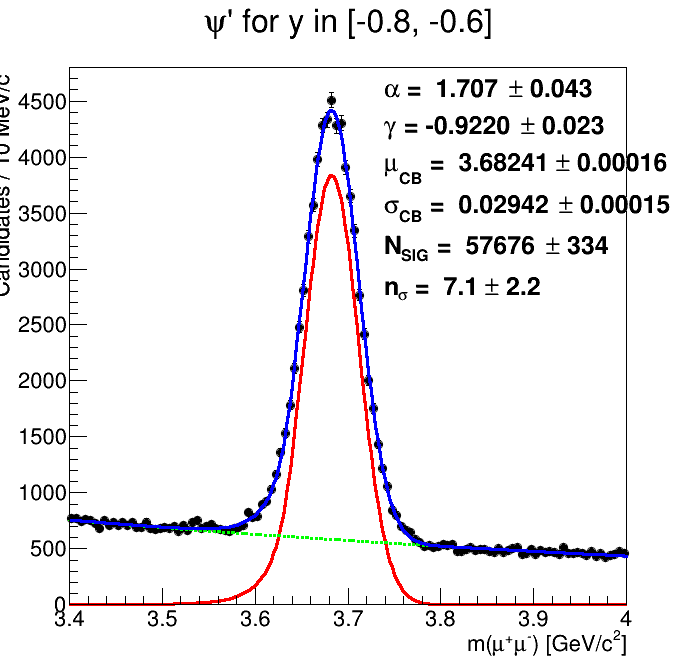

In [51]:
#/////////////////////////////////////////////////////////////////////////////////////
#////////////////////////////////////// 2nd part of the exercise: try CB+exp ///////////
#/////////////////////////////////////////////////////////////////////////////////////

# Signal model
mGCB = ROOT.RooRealVar("#mu_{CB}", "meanCB", 3.7, 3.67, 3.73)
sigma1CB = ROOT.RooRealVar("#sigma_{CB}", "sigma1CB", 0.02, 0.001, 0.1)
alpha = ROOT.RooRealVar("#alpha", "alpha", 2.0, 0.5, 10.0)
nSigma = ROOT.RooRealVar("n_{#sigma}", "nSigma", 2.0, 0.1, 50.0)
sigCBPdf = ROOT.RooCBShape("sigCBPdf", "sigCBPdf", xVar, mGCB, sigma1CB, alpha, nSigma)

# Background model
gamma = ROOT.RooRealVar("#gamma", "Gamma", -0.1, -2.0, -0.01)
bkgExpPdf = ROOT.RooExponential("bkgExpPdf", "bkgExpPdf", xVar, gamma)

# Yield parameters
nBkgExp = ROOT.RooRealVar("N_{EXPBKG}", "nBkgExp", 120e3, 1.0, 1e6)
nSigCB = ROOT.RooRealVar("N_{SIG}", "nSigCB", 2e5, 1.0, 1e6)

# Combine signal and background models
totalCBExpPDF = ROOT.RooAddPdf("totalCBExpPDF", "totalCBExpPDF",
                               ROOT.RooArgList(sigCBPdf, bkgExpPdf),
                               ROOT.RooArgList(nSigCB, nBkgExp))

# Execute the Binned ML fit
totalCBExpPDF.fitTo(MuMuHist, ROOT.RooFit.Extended(True), ROOT.RooFit.Minos(False))

# Create frame for xVar
xframe1 = xVar.frame()
xframe1.SetTitle(hPsiPrime.GetTitle())
xframe1.SetYTitle("Candidates / 10 MeV/c^{2}")

# Plot data and PDFs on frame
MuMuHist.plotOn(xframe1)
totalCBExpPDF.plotOn(xframe1)

# Plot signal and background components with specific colors and styles
totalCBExpPDF.plotOn(xframe1, ROOT.RooFit.Components(ROOT.RooArgSet(sigCBPdf)), ROOT.RooFit.LineColor(ROOT.kRed))
totalCBExpPDF.plotOn(xframe1, ROOT.RooFit.Components(ROOT.RooArgSet(bkgExpPdf)), ROOT.RooFit.LineColor(ROOT.kGreen), ROOT.RooFit.LineStyle(ROOT.kDashed))

totalCBExpPDF.plotOn(xframe1)   ## for correct pulls

# Add parameter box with best estimates
totalCBExpPDF.paramOn(xframe1, ROOT.RooFit.Parameters(ROOT.RooArgSet(mGCB, sigma1CB, alpha, nSigma, nSigCB, gamma)), ROOT.RooFit.Layout(0.529, 0.99, 0.9))


myC = ROOT.TCanvas("myC", "PsiPrimeMassPlot", 700, 700)
myC.cd()
xframe1.Draw()
myC.SaveAs(f"{plot_dir}/PsiPrimeMassFit_CB_Exp.png")
myC.Draw()

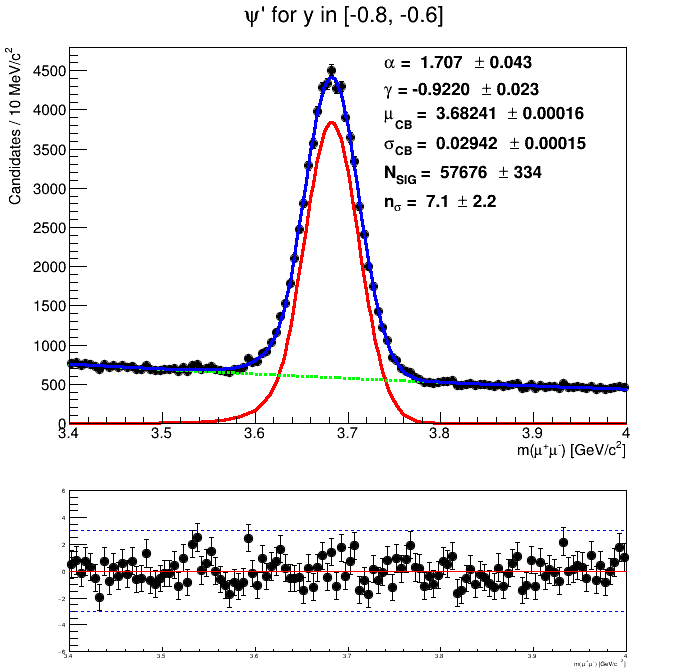

In [52]:
# Create frame for pulls
framePull1 = xVar.frame()
framePull1.SetTitle(" ")
framePull1.SetMinimum(-6)
framePull1.SetMaximum(6)

# Calculate pulls and add to framePull1
pulls1 = xframe1.pullHist()
framePull1.addObject(pulls1, "P")

# Divide the canvas into two pads (Top: Main plot, Bottom: Pull plot)
myC.Divide(0, 2)  # 1 column, 2 rows

# Draw the pull plot on the bottom pad
myC.cd(2)
ROOT.gPad.SetPad(0., 0., 1., 0.3)
framePull1.Draw()

# Draw horizontal lines at y=0, y=3, y=-3
line_center = ROOT.TLine(xMin, 0, xMax, 0)
line_center.SetLineColor(ROOT.kRed)
line_center.Draw("same")

line_up = ROOT.TLine(xMin, 3, xMax, 3)
line_up.SetLineColor(ROOT.kBlue)
line_up.SetLineStyle(ROOT.kDashed)
line_up.Draw("same")

line_down = ROOT.TLine(xMin, -3, xMax, -3)
line_down.SetLineColor(ROOT.kBlue)
line_down.SetLineStyle(ROOT.kDashed)
line_down.Draw("same")

# Draw the main plot on the top pad
myC.cd(1)
ROOT.gPad.SetPad(0., 0.3, 1., 1.)
xframe1.Draw()
myC.Draw()

In [ ]:
f1.Close()
del f1, hPsiPrime,myC,myCP,xMin,xMax,nBins,bin_width,xVar,MuMuHist,mG,sigma1,sigPDF,c1,c2,bkgPDF,nSig,nBkg,totalPDF,xframe,framePull,hPulls,line,lineUp,lineDown,myCP,mGCB,sigma1CB,alpha,nSigma,sigCBPdf,gamma,bkgExpPdf,nBkgExp,nSigCB,totalCBExpPDF,xframe1,framePull1,line_center

# **PART 2**

In [54]:
from ROOT import TGraphAsymmErrors
from ROOT import RooPlot, RooCBShape, RooFormulaVar, RooExponential
from ROOT import TGraphErrors, TF1, TH1D, gPad, TLegend, TAxis, TColor
from array import array


In [55]:
f1 = ROOT.TFile("/content/hlt_5_newSoftMuon_alsoInPsiPrimeWind.root", "READ")
f1.ls()

TFile**		/content/hlt_5_newSoftMuon_alsoInPsiPrimeWind.root	
 TFile*		/content/hlt_5_newSoftMuon_alsoInPsiPrimeWind.root	
  KEY: TH1F	myInclusiveMuMuMass;1	myInclusiveMuMuMass
  KEY: TH1F	myInclusiveMuMuMass_noTrigg;1	myInclusiveMuMuMass noTrigg
  KEY: TH1F	myInclusiveMuMuMass_hlt_0_v3;1	myInclusiveMuMuMass_hlt_0_v3
  KEY: TH1F	myInclusiveMuMuMass_hlt_0_v4;1	myInclusiveMuMuMass_hlt_0_v4
  KEY: TH1F	myInclusiveMuMuMass_hlt_0_v5;1	myInclusiveMuMuMass_hlt_0_v5
  KEY: TH1F	myInclusiveMuMuMass_hlt_0_v6;1	myInclusiveMuMuMass_hlt_0_v6
  KEY: TH1F	myInclusiveMuMuMass_hlt_0_v3A;1	myInclusiveMuMuMass_hlt_0_v3A
  KEY: TH1F	myInclusiveMuMuMass_hlt_0_v3B;1	myInclusiveMuMuMass_hlt_0_v3B
  KEY: TH1F	myInclusiveMuMuMass_hlt_0_v6C;1	myInclusiveMuMuMass_hlt_0_v6C
  KEY: TH1F	myInclusiveMuMuMass_hlt_0_v6D;1	myInclusiveMuMuMass_hlt_0_v6D
  KEY: TH1F	myInclusiveMuMuMass_hlt_0_v3Bv4;1	myInclusiveMuMuMass_hlt_0_v3Bv4
  KEY: TH1F	myInclusiveMuMuMass_hlt_0_v5v6C;1	myInclusiveMuMuMass_hlt_0_v5v6C
  KEY: TH1F	my

In [57]:
ROOT.gROOT.Reset()
ROOT.gROOT.Clear()

ROOT.gROOT.SetStyle("Plain")
ROOT.gStyle.SetOptStat(10)


# Rapidity bins (22 out of 24)[*]
numeri = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"]
#-logic : bin-2=-2.2/-2.0 ; bin-3=-2.0/-1.8 ; bin-4=-1.8/-1.6 ; bin-5=-1.6/-1.4 ; bin-6=-1.4/-1.2 ; bin-7=-1.2/-1.0 ; bin-8=-1.0/-0.8 ; bin-9=-0.8/-0.6
#         bin-10=-0.6/-0.4 ; bin-11=-0.4/-0.2 ; bin-12=-0.2,0.0 ; bin-13=0.0/0.2 ; bin-14=0.2/0.4 ; bin-15=0.4,0.6 ; bin-16=0.6/0.8
#         bin-17=0.8/1.0 ; bin-18=1.0/1.2 ; bin-19:1.2/1.4 ; bin-20=1.4/1.6; bin-21=1.6/1.8 ; bin-22=1.8/2.0 ; bin-23=2.0/2.2
#
#         [*](skipping two extreme bins: bin-1=-2.4/-2.2 & bin-24=2.2/2.4 because of the low statistics)

# vectors for the final graph
vec = [0] * 22
vec_err = [0] * 22

# vec_err_h = [] # just in case we use Minos
# vec_err_l = [] # just in case we use Minos
#this is if we want to do give a vector of initial values to the fit:
#vec_init_sig_param = [3000,5000,7500,10000,15000,20000,30000,40000,50000,65000,80000,80000,65000,50000,40000,30000,20000,15000,10000,7500,5000,40000]


# Canvas for my plots:
myCanvas = TCanvas("myCanvas", "myCanvas", 700, 700)
gPad.SetBottomMargin(0.15)
gPad.SetLeftMargin(0.1)
gPad.SetRightMargin(0.1)
gPad.SetTopMargin(0.1)

for i in range(22):
    # Open file and read histogram
    histo = f1.Get("PsiPrimeMass_bin" + numeri[i])
    nBins = histo.GetNbinsX()
    bin_width = histo.GetBinWidth(1)  #needed later

    # Creation of the object RooDataHist from the histogram
    x = RooRealVar("x", "x", 3.4, 3.96)
    psiprime = RooDataHist(histo.GetName(), histo.GetTitle(), RooArgSet(x), RooFit.Import(histo, False))

    # Frame for plotting and style options
    xframe = x.frame(Title="")
    #xframe.SetTitle("#mu#mu invariant mass spectrum")
    xframe.SetTitle("")
    xframe.SetTitleOffset(1.32, "y")
    xframe.SetLabelSize(0.025, "y")
    xframe.SetTitleSize(0.038, "y")
    # Converts bin width to MeV and formats it with 1 decimal place
    xframe.SetYTitle(f"Candidates/(%.1f MeV)" % (1000 * bin_width))
    #or
    #xframe.SetYTitle(f"Candidates/({1000 * bin_width:.1f} MeV)")

    xframe.SetLabelSize(0.025, "x")
    xframe.SetTitleSize(0.029, "x")
    xframe.SetTitleOffset(0.93, "x")
    xframe.SetXTitle("m(#mu#mu)")

    # "putting" the RooDataHist object on the RooPlot
    psiprime.plotOn(xframe)
    psiprime.SetTitle("")


    #-----------START FIT
    # Signal peak (Crystal Ball)
    meanCB1 = RooRealVar("meanCB1", "meanCB1", 3.675, 3.64, 3.72)
    sigmaCB1 = RooRealVar("sigmaCB1", "sigmaCB1", 0.040, 0.001, 0.700)
    alpha1 = RooRealVar("alpha1", "alpha1", 1.5, 0.01, 15.)
    nCB1 = RooRealVar("nCB1", "nCB1", 2.0, 0.001, 20.)
    myCB1 = RooCBShape("myCB1", "myCB1", x, meanCB1, sigmaCB1, alpha1, nCB1)

    #print(f"\n alpha1 is = {alpha1.getVal()}, when i = {i}")  # just a test

    #sfCB1 = RooRealVar("sfCB1", "sfCb1", 0.1, 0.0001, 3.)
    #scaledG = RooFormulaVar("scaledG", "@0*@1", RooArgList(sfCB1, sigmaCB1))
    #myG = RooGaussian("myG", "myG", x, meanCB1, scaledG)

    #Background shape
    #Try Chebychev Poly of order2

    c1 = RooRealVar("c1", "1st coeff", -0.30, -1000, 100) #originale -0.3
    c2 = RooRealVar("c2", "2nd coeff", 0.1, -1000, 100) #originale 0.01
    cheby = RooChebychev("cheby", "Chebychev 2", x, RooArgList(c1, c2))


    #Signal & Background yields
    ##it is possible to feed a vector of starting values if needed but first you need to deine vec_init_sig_param
    #vec_init_sig_param = [3000, 5000, 7500, 10000, 15000, 20000, 30000, 40000, 50000, 65000, 80000, 80000, 65000, 50000, 40000, 30000, 20000, 15000, 10000, 7500, 5000, 40000]
    #nSig = RooRealVar("nSig", "Number of signal candidates", vec_init_sig_param[i], 1e+2, 1e+8)

    nSig = RooRealVar("nSig", "Number of signal candidates", 4e+5, 1e+2, 1e+8)
    #nSig2 = RooRealVar("nSig2", "Number of candidates in additional Gaussian", 500, 10, 1e+7)
    nBkg = RooRealVar("nBkg", "Number of bkgrd candidates", 60e+4, 1e+2, 1e+8)

    #totalPdf = RooAddPdf("totalPdf", "totalPdf", RooArgList(myCB1, myG, cheby), RooArgList(nSig, nSig2, nBkg))
    totalPdf = RooAddPdf("totalPdf", "totalPdf", RooArgList(myCB1, cheby), RooArgList(nSig, nBkg))

    # Fit command
    totalPdf.fitTo(psiprime, RooFit.Extended(True)) #by default only HESSE is executed (MINOS is not)

    # Filling vectors
    vec[i] = 1000.0 * sigmaCB1.getValV()
    #to use following 2 commented lines you should define vec_err_h and vec_err_l
    #vec_err_h = [0] * 22
    #vec_err_l = [0] * 22
    #vec_err_h[i] = sigmaCB1.getAsymErrorHi()  # Se uso MINOS per il fit
    #vec_err_l[i]= sigmaCB1.getAsymErrorLo() # Se uso MINOS per il fit
    vec_err[i] = 1000 * sigmaCB1.getError()

    # Draw fit results
    totalPdf.plotOn(xframe, RooFit.LineColor(ROOT.kRed))
    totalPdf.plotOn(xframe, RooFit.Components(RooArgSet(myCB1)), RooFit.LineColor(ROOT.kGreen))
    totalPdf.plotOn(xframe, RooFit.Components(RooArgSet(cheby)), RooFit.LineStyle(ROOT.kDashed))
    #totalPdf.plotOn(xframe, RooFit.Components(RooArgSet(myG)), RooFit.LineColor(ROOT.kMagenta))

    #Redraw the full fit curve to allow for correct pulls (if will be done)
    totalPdf.plotOn(xframe, RooFit.LineColor(ROOT.kRed))

    # Box of parameters
    totalPdf.paramOn(xframe, RooFit.Parameters(RooArgList(meanCB1, sigmaCB1)), RooFit.Layout(0.57, 0.998, 0.90))

    # Do the draw of the frame
    xframe.getAttText().SetTextSize(0.03)
    xframe.SetTitle(f"Fit result for bin {numeri[i]}")
    xframe.Draw()

    #myCanvas.SaveAs(f"./Plots/bin{numeri[i]}_new.png")
    myCanvas.SaveAs(f"{plot_dir}bin{numeri[i]}_new.png")


myCanvas.Clear()

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(PsiPrimeMass_bin2): fit range of variable x expanded to nearest bin boundaries: [3.4,3.96] --> [3.4,3.96]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (myCB1,cheby)
 **********
 **  199 **SET PRINT           1
 **********
 **********
 **  200 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha1       1.50000e+00  7.45000e-01    1.00000e-02  1.50000e+01
     2 c1          -3.00000e-01  5.01500e+01   -1.00000e+03  1.00000e+02
     3 c2           1.00000e-01  4.99500e+01   -1.00000e+03  1.00000e+02
     4 meanCB1      3.67500e+00  8.00000e-03    3.64000e+00  3.72000e+00
     5 nBkg         6.00000e+05  2.99950e+05    1.00000e+02  1.00000e+08
 MINUIT WARNING IN PARAM DEF
 ============== LIMITS ON PARAM5 TOO FAR APART.
 PARAMETER D

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvas
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/Plotsbin2_new.png has been created
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/Plotsbin3_new.png has been created
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/Plotsbin4_new.png has been created
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/Plotsbin5_new.png has been created
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/Plotsbin6_new.png has been created
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/Plotsbin7_new.png has been created
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/Plotsbin8_new.png has been created
Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/Plotsbin9_new.png has been created
Info in <TCanvas::Print>: png file /content/

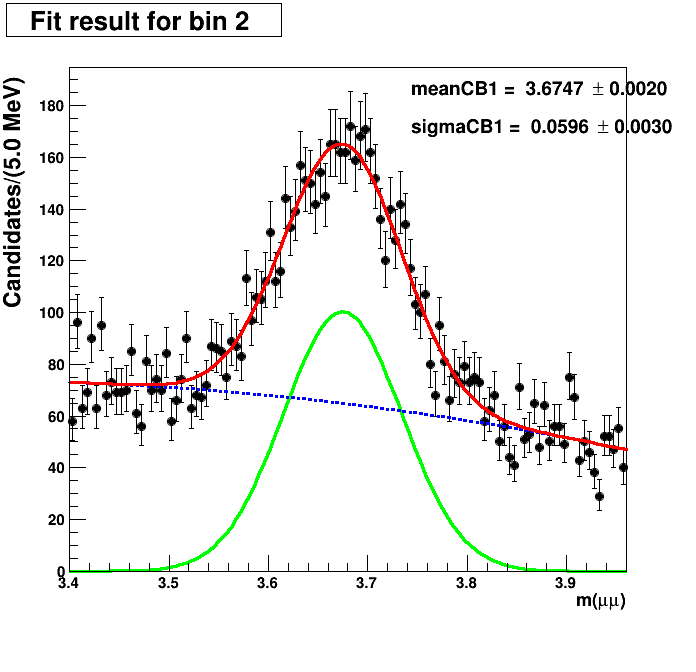

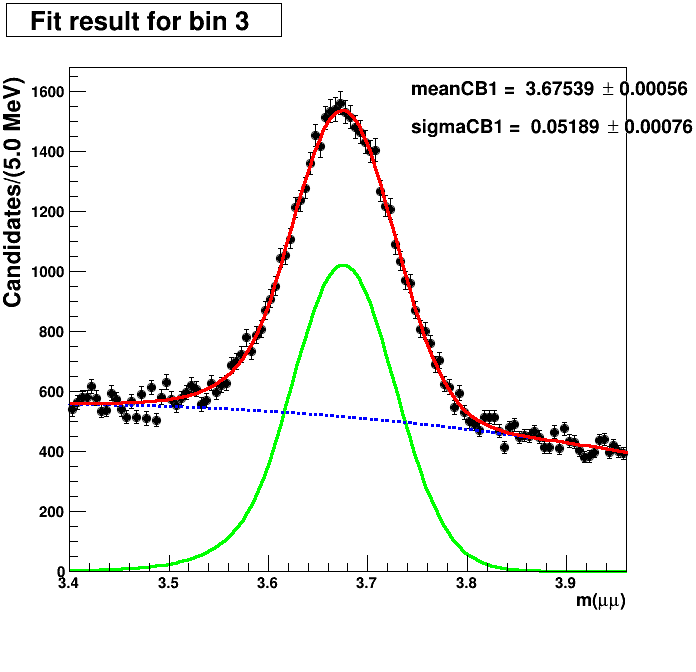

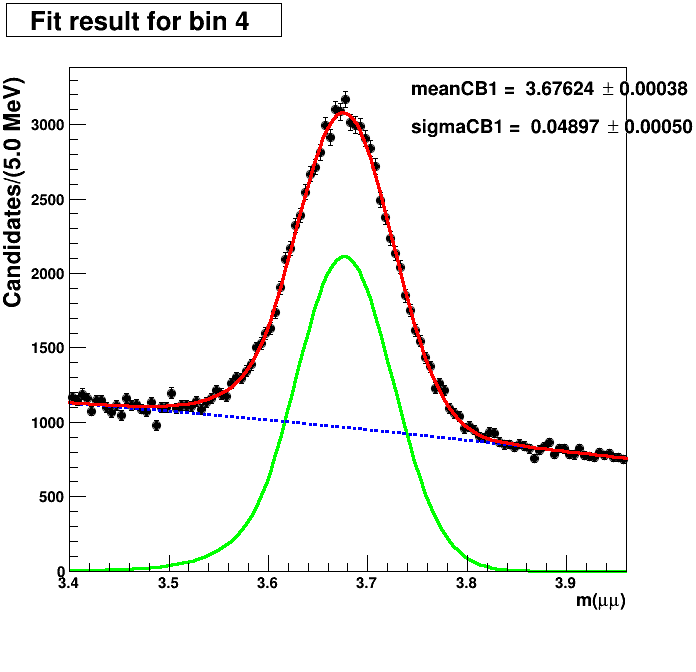

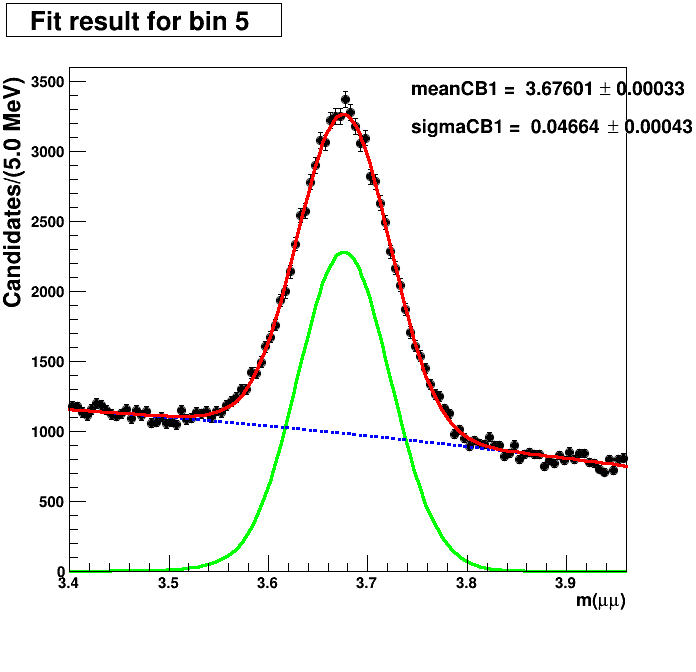

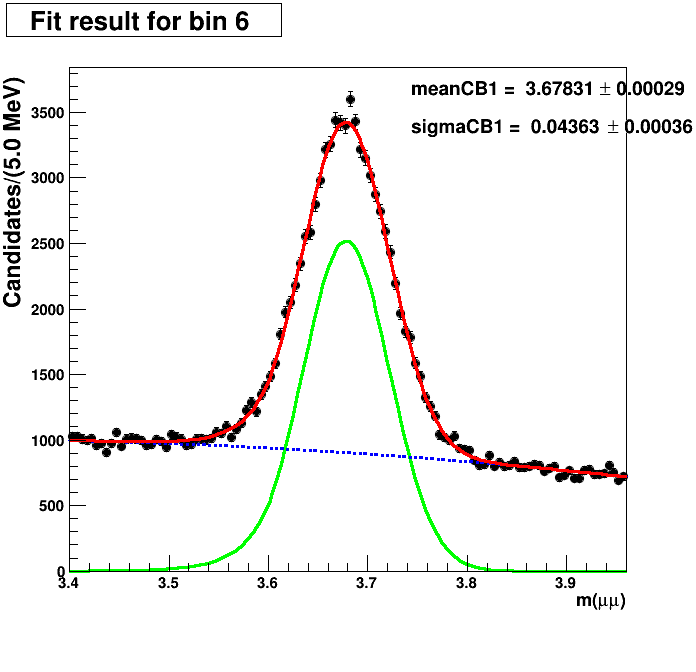

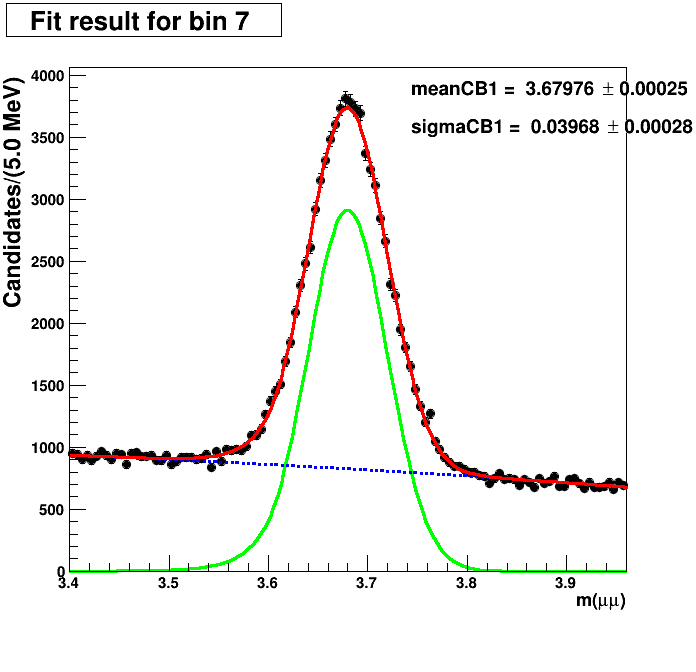

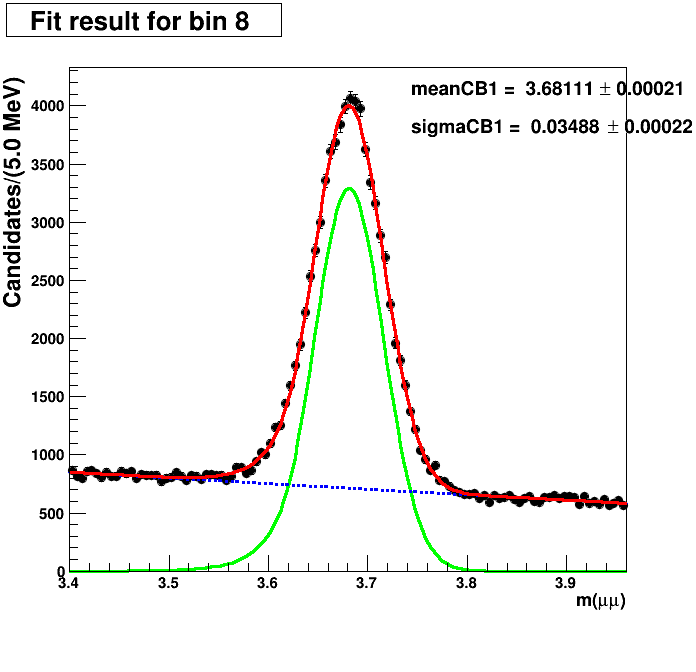

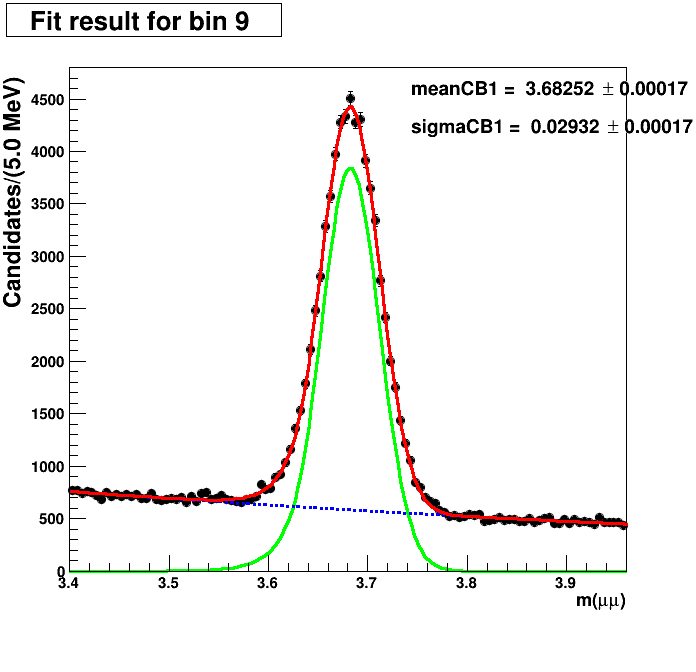

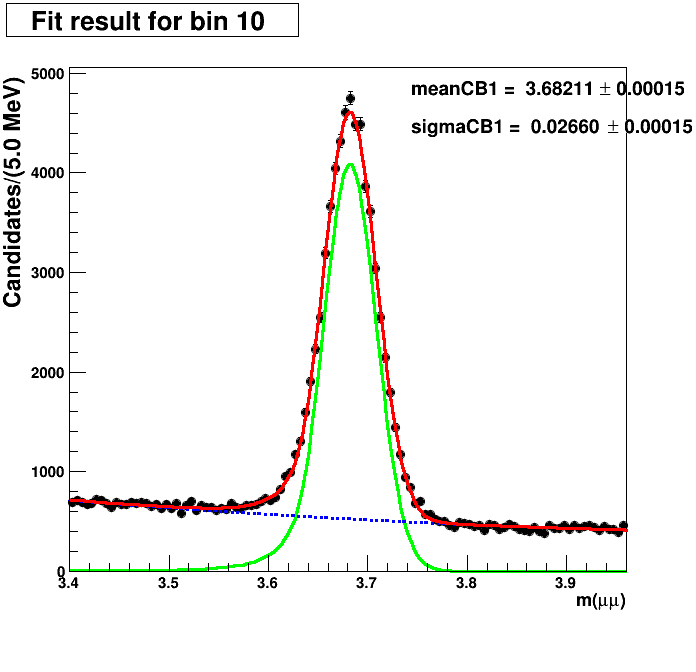

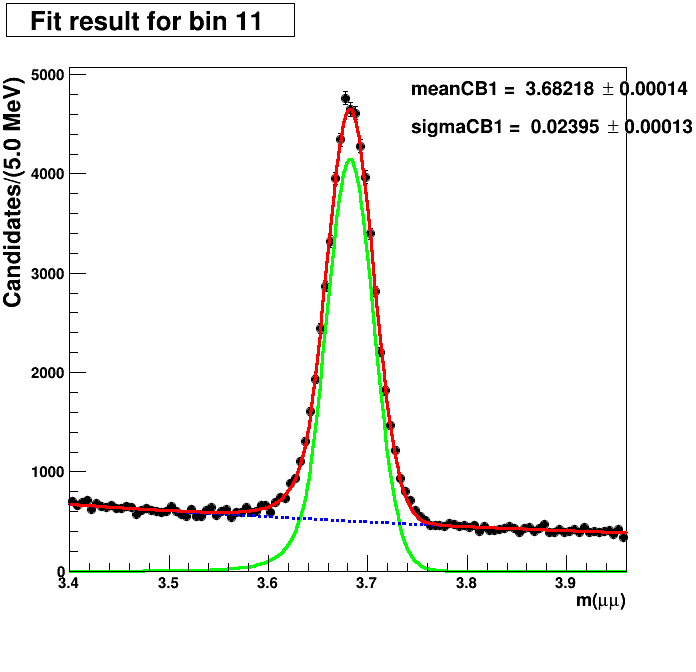

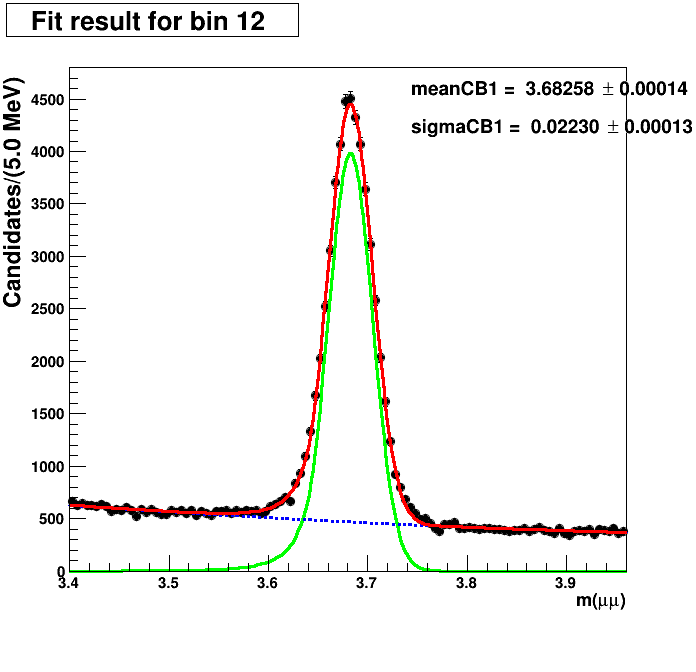

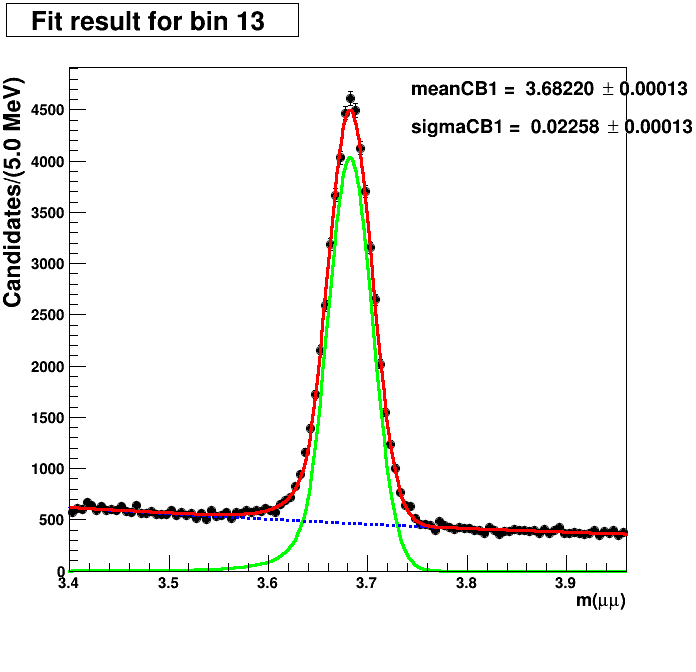

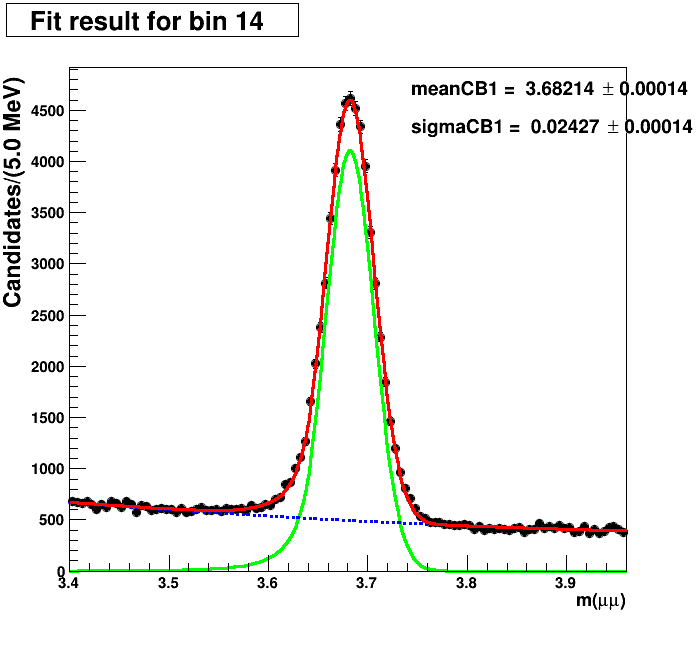

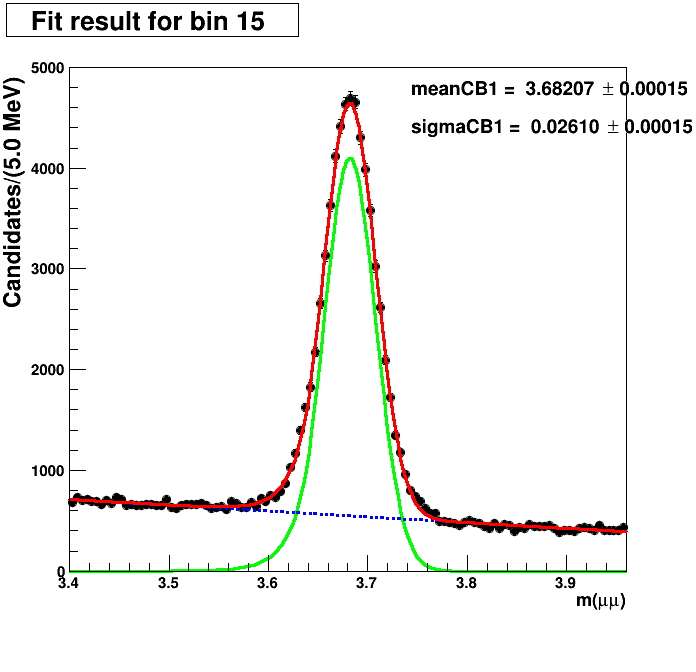

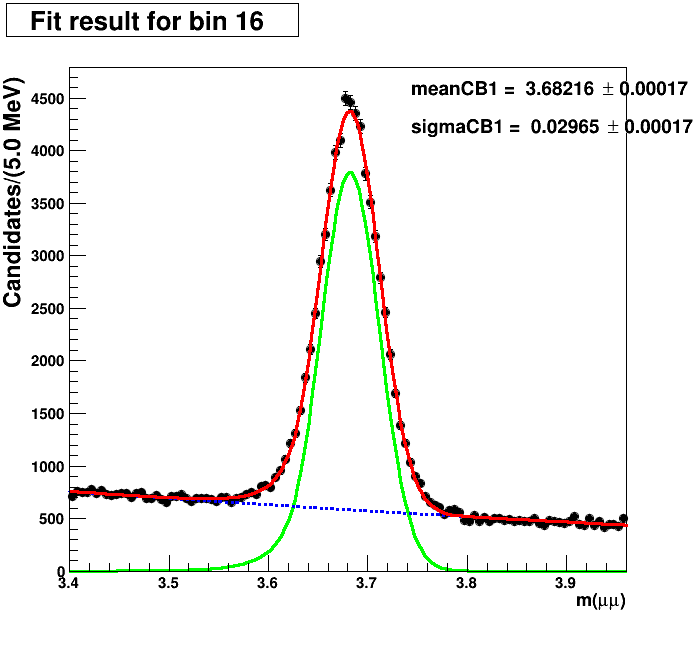

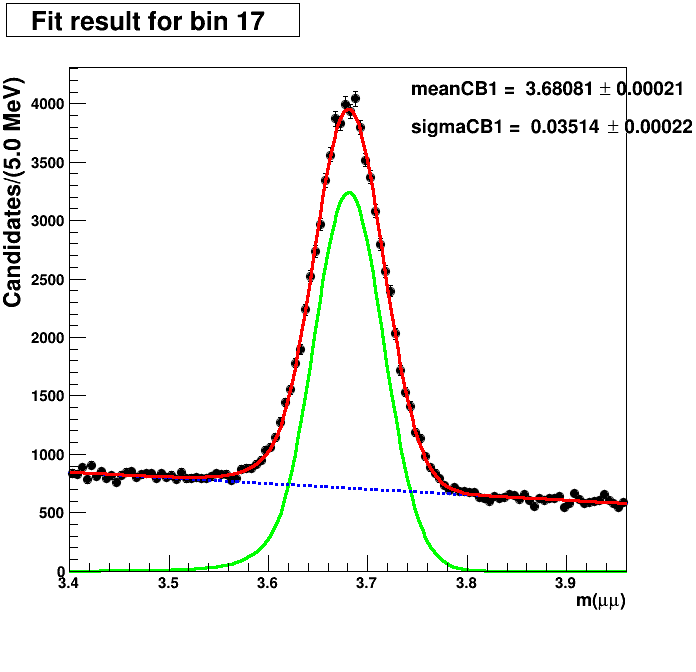

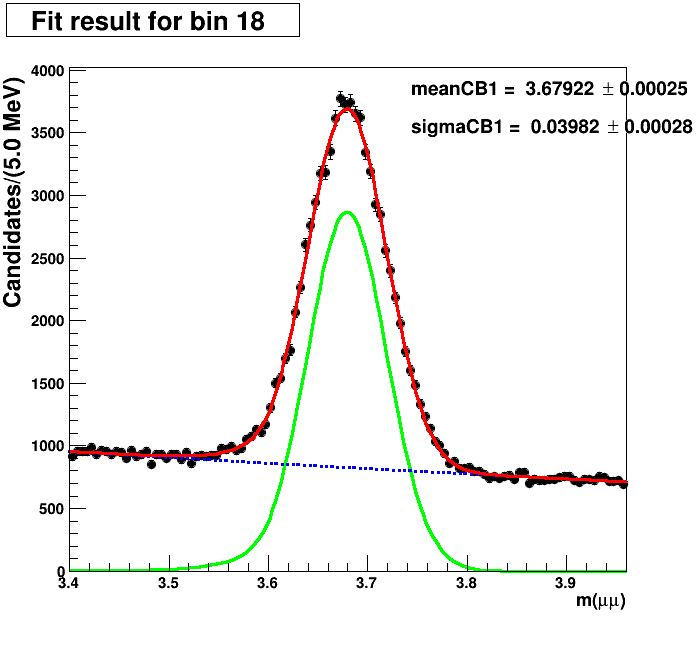

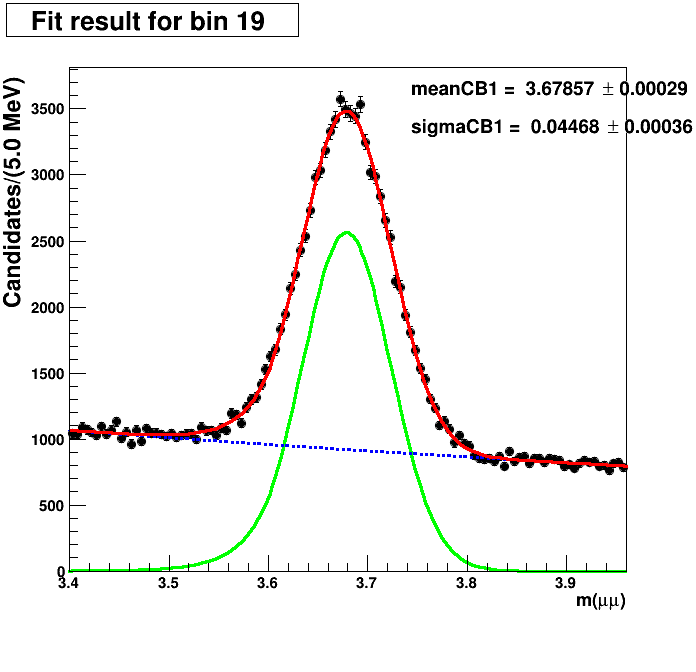

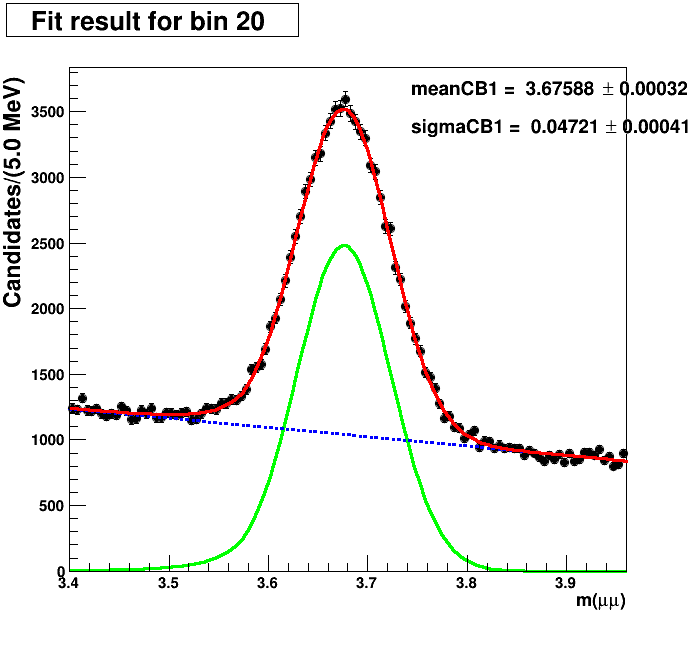

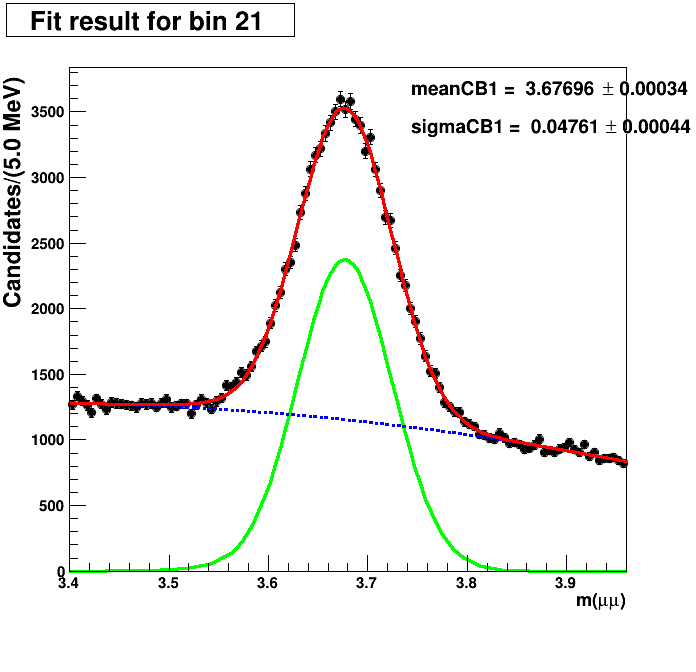

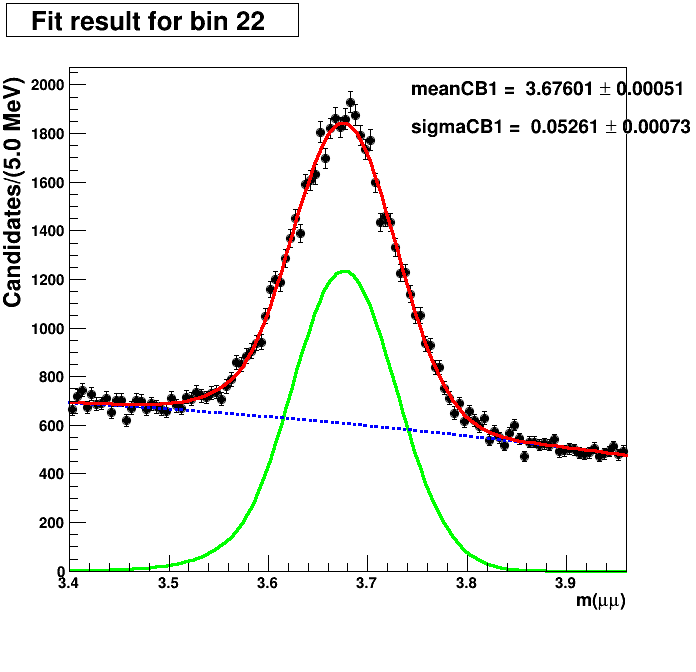

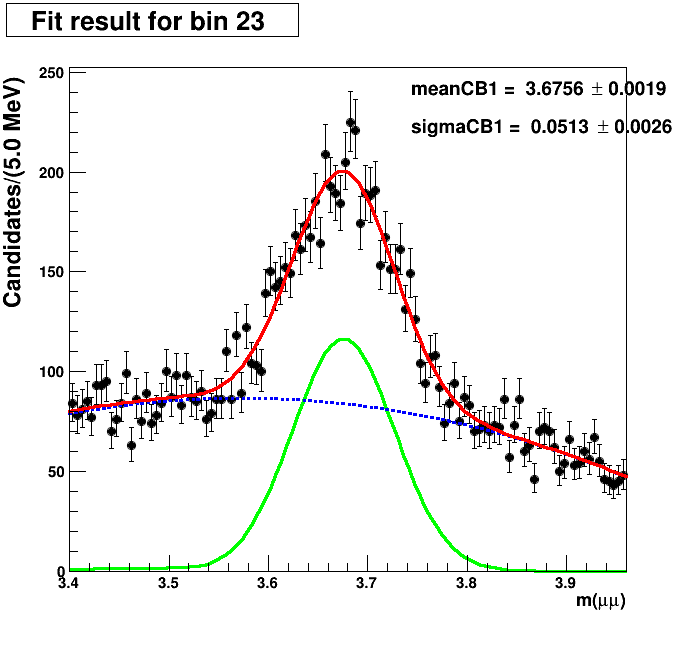

In [58]:
from IPython.display import Image, display

for i in range(22):
    num = str(i + 2)  # numeri[0] = "2"
    filename = f"{plot_dir}bin{num}_new.png"
    display(Image(filename=filename))


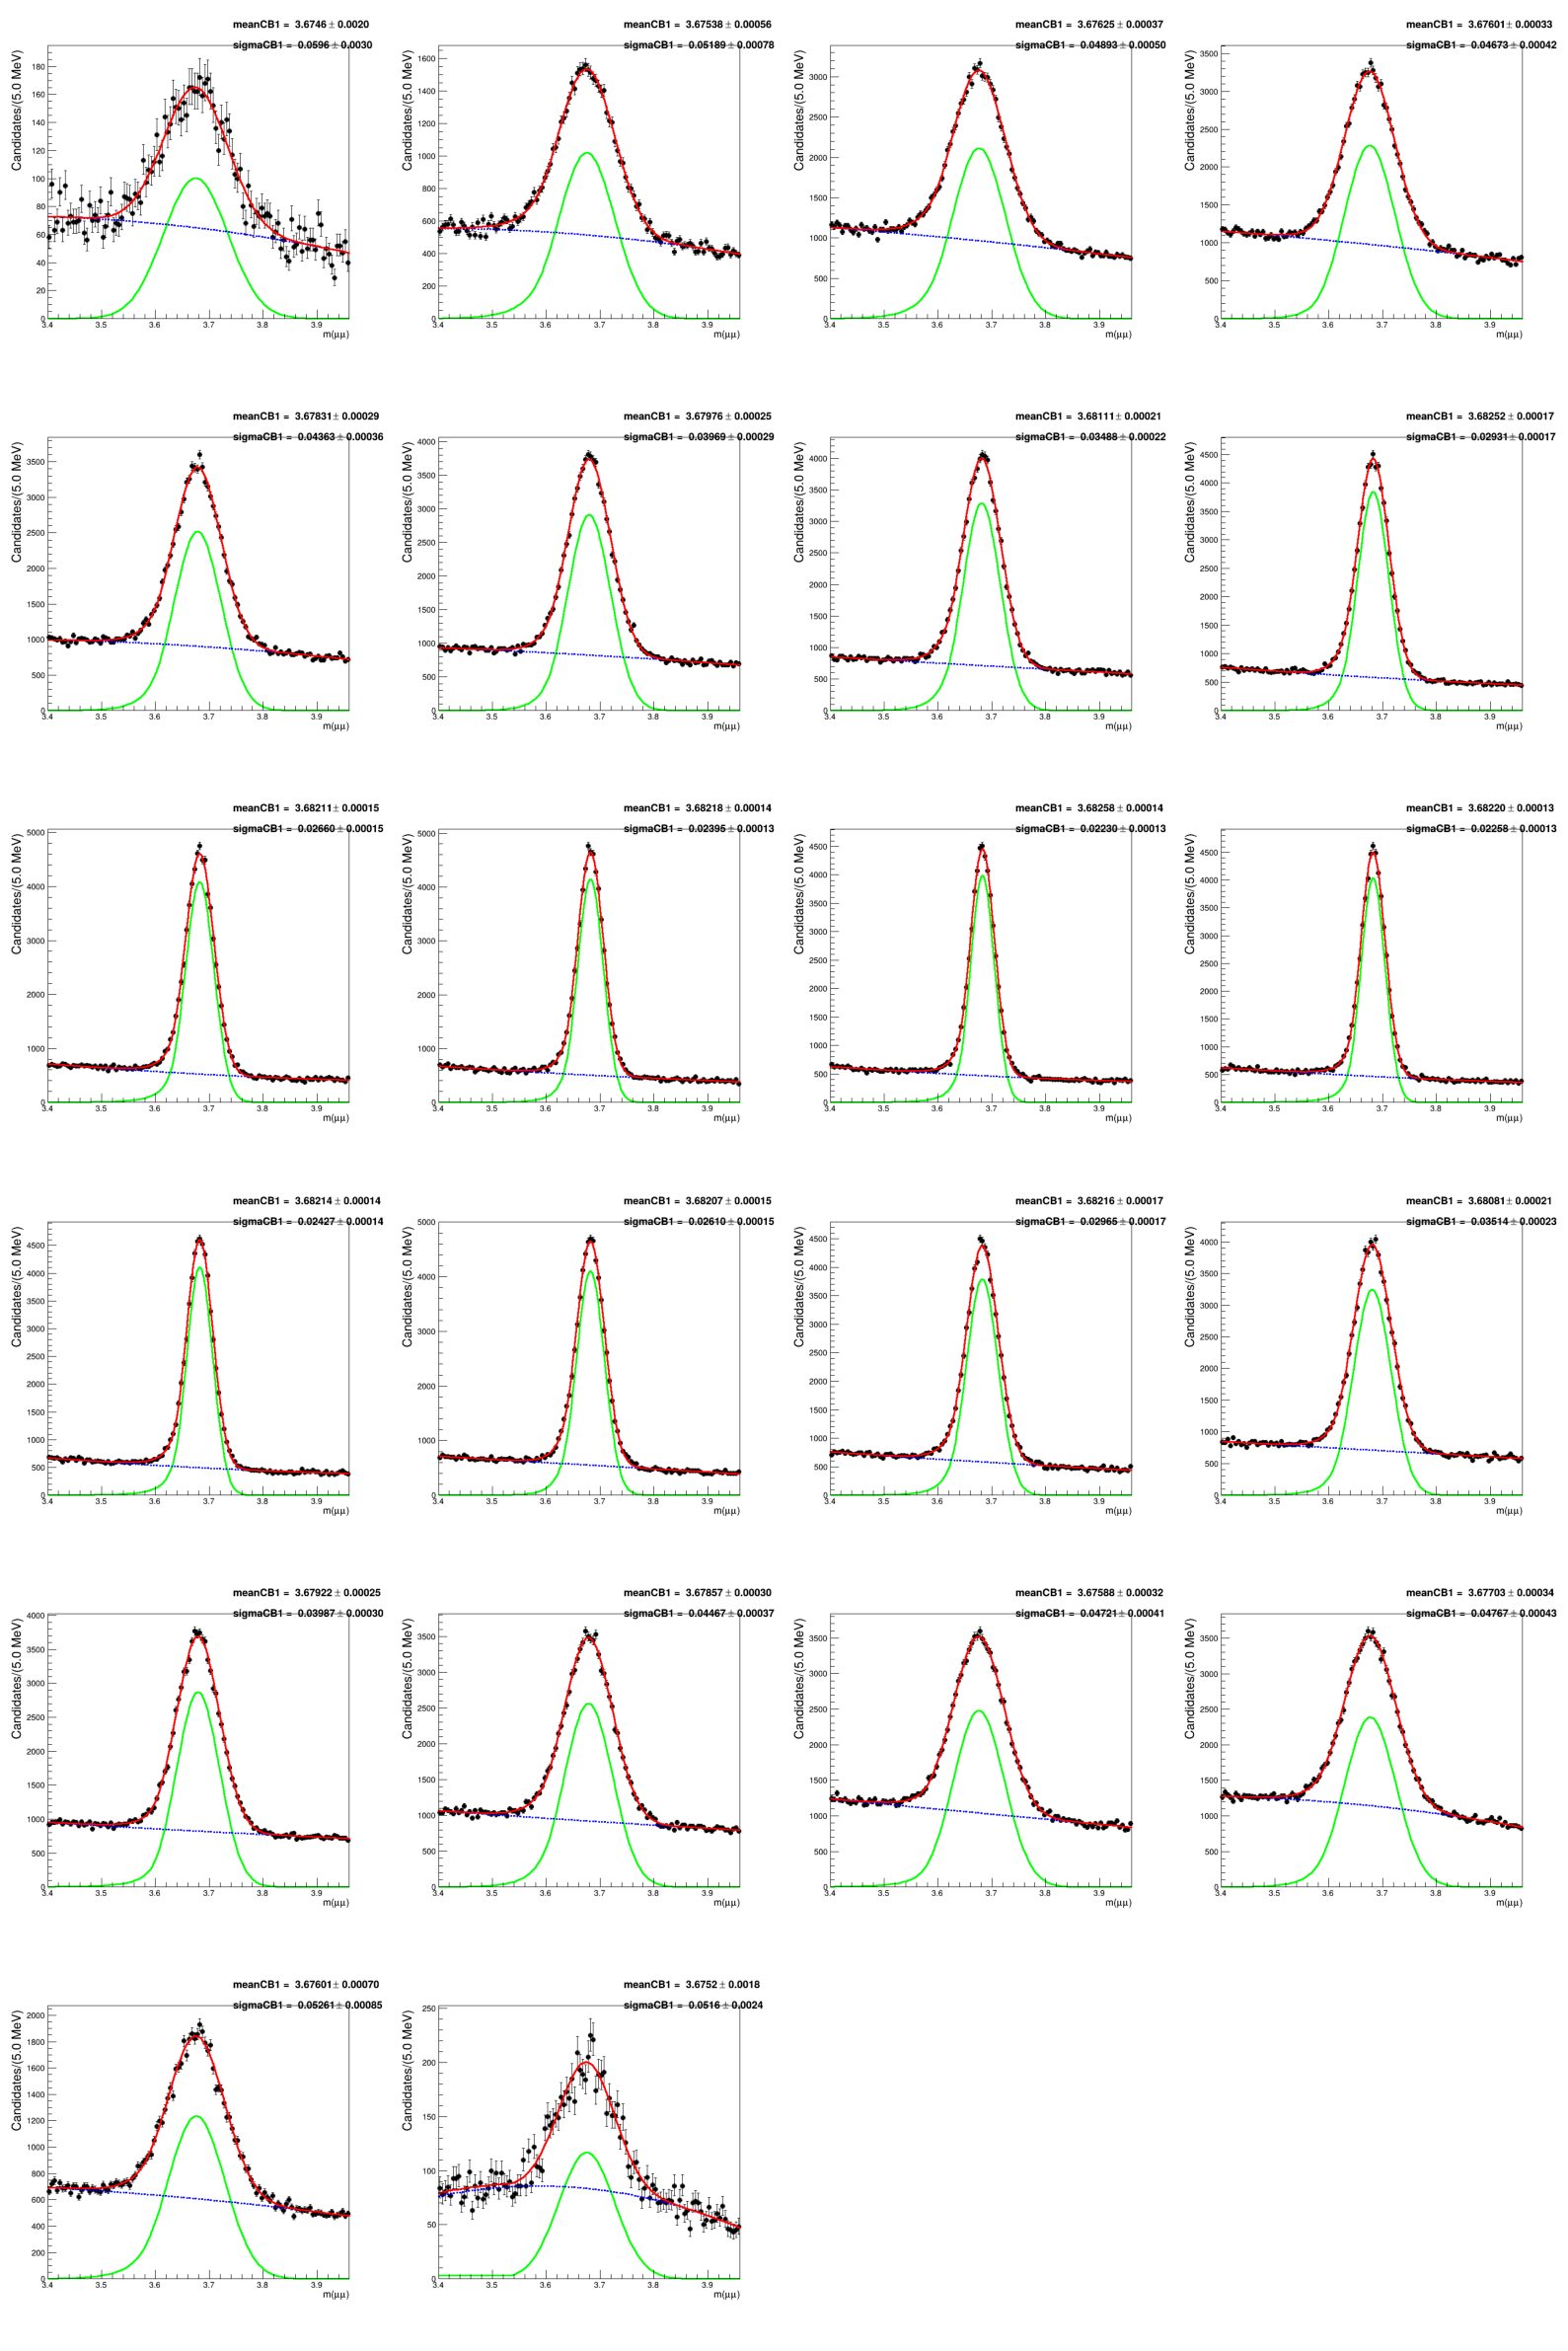

In [59]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

num_images = 22
cols = 4
rows = (num_images + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))

for idx in range(num_images):
    num = str(idx + 2)
    img_path = os.path.join(plot_dir, f"bin{num}_new.png")
    img = mpimg.imread(img_path)

    ax = axes[idx // cols][idx % cols] if rows > 1 else axes[idx % cols]
    ax.imshow(img)
    ax.axis('off')
    #ax.set_title(f"bin {num}")

# This loop hides the unused (empty) subplots in the grid.
# For example, if we have 22 images to display in a 6x4 grid (24 slots),
# the last 2 slots will be empty. Without this loop, they would appear as
# empty boxes with visible axes, which looks messy.
# We disable their axes to make them visually disappear.
for idx in range(num_images, rows * cols):
    ax = axes[idx // cols][idx % cols] if rows > 1 else axes[idx % cols]
    ax.axis('off')

plt.tight_layout()
plt.show()


## second section

In [60]:
#As central values we assign the center of each rapidity bin

rapidity = array('d', [-2.1, -1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1])

rapidity_err = array('d', [0] * 22)

# As uncertainty we assign the bin's half-width (0.1 in this case)
for i in range(22):
    rapidity_err[i] = 0.1


#-- if the fit would have been providing asymmetric errors on the parameter.
#grafico_errori = TGraphAsymmErrors(22, rapidity, vec, rapidity_err, rapidity_err, vec_err_l, vec_err_h)


final = TCanvas("final", "final", 700, 700)
vec = array('d', vec)
vec_err = array('d', vec_err)

# TGraphErrors oluştur
grafico_errori = TGraphErrors(22, rapidity, vec, rapidity_err, vec_err)

gPad.SetBottomMargin(0.15)
gPad.SetLeftMargin(0.15)
gPad.SetRightMargin(0.1)
gPad.SetTopMargin(0.1)

grafico_errori.SetMarkerStyle(20)
grafico_errori.SetMarkerColor(600) #kBlue
grafico_errori.SetTitle("")
grafico_errori.GetXaxis().SetTitle("Rapidity/0.2")

grafico_errori.GetXaxis().SetLabelSize(0.03)
grafico_errori.GetXaxis().SetTitleOffset(1.1)
grafico_errori.GetYaxis().SetTitleOffset(1.1)
grafico_errori.GetYaxis().SetLabelSize(0.03)
grafico_errori.GetYaxis().SetTitle("#sigma(MeV)")
grafico_errori.GetYaxis().SetDecimals(1)
grafico_errori.Draw("AP")

# Try a Parabola
#myFunc = TF1("myFunc", "[0] + [1]*x + [2]*x*x", -2.2, 2.2)
#myFunc.SetParameters(0.02, 1, 1)

#Try an hyperbolic Cosine
#myFunc = TF1("myFunc", "[0] + 0.5*[1]*TMath::Exp([2]*x) + 0.5*[1]*TMath::Exp(-[2]*x)", -2.2, 2.2)
#myFunc.SetNpx(100)
#myFunc.SetParameters(30., 1, 0.01)
#myFunc.SetParLimits(0, -10, 22)
#myFunc.SetParLimits(1, 0., 30.)
#myFunc.SetParLimits(2, -100, 100)

#Try a simple Cosine:
myFunc = TF1("myFunc", "[0]-[1]*TMath::Cos([2]*x)", -2.2, 2.2)
myFunc.SetParameters(35., 15., 1.)
myFunc.SetParLimits(0, 10, 60)
myFunc.SetParLimits(1, 5., 30.)
myFunc.SetParLimits(2, -10, 10)

myFunc.SetLineColor(632) #kRed
myFunc.SetLineWidth(2)

gStyle.SetOptFit(1111)
grafico_errori.Fit(myFunc, "R")

gPad.Update()

final.SaveAs(f"{plot_dir}/grafico_finale_new.png")


# The line below is commented out because calling final.Draw() in a Jupyter Notebook environment causes the kernel to crash.
# This is likely due to the presence of GUI-dependent ROOT objects (such as TPaveStats or TPaveText added via paramOn),
# which require a graphical event loop that is not supported in Jupyter.
# Instead of drawing the canvas directly, we save the plot to a PNG file and display it below using IPython tools.

#final.Draw()


 FCN=11.5864 FROM MIGRAD    STATUS=CONVERGED     114 CALLS         115 TOTAL
                     EDM=2.93205e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.78728e+01   6.66339e-01   1.41650e-05   2.28014e-02
   2  p1           1.55330e+01   6.38263e-01   3.09811e-05  -3.52625e-03
   3  p2           1.45388e+00   6.46959e-02   4.89926e-06   4.21927e-02


Info in <TCanvas::Print>: png file /content/drive/My Drive/Colab Notebooks/Plots/grafico_finale_new.png has been created


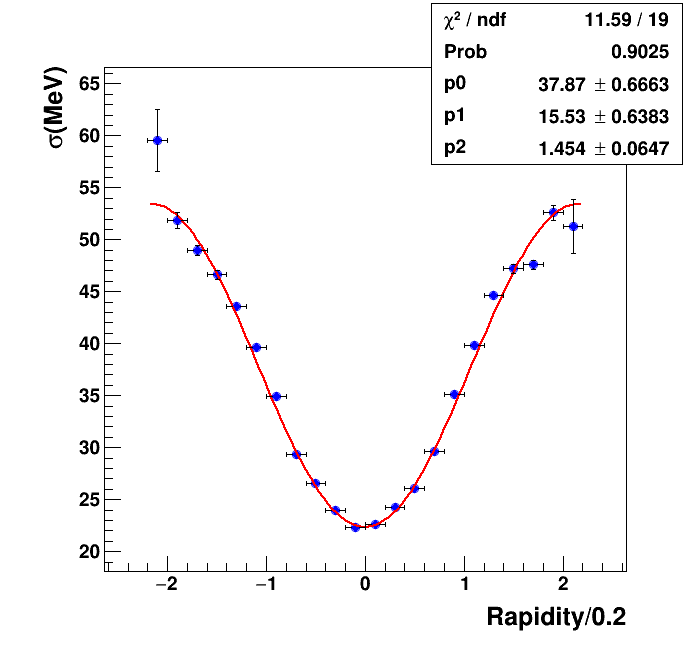

In [61]:
    from IPython.display import display, Image
    display(Image(filename=f"{plot_dir}/grafico_finale_new.png"))